In [1]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import hopsworks
import pandas as pd
import numpy as np

In [3]:
project = hopsworks.login()
fs = project.get_feature_store()


Connected. Call `.close()` to terminate connection gracefully.

Multiple projects found. 

	 (1) SMLlab1IJ_part1
	 (2) scalable1

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/203927
Connected. Call `.close()` to terminate connection gracefully.


In [4]:
wine_df = pd.read_csv("https://raw.githubusercontent.com/ID2223KTH/id2223kth.github.io/master/assignments/lab1/wine.csv")
# wine_df = wine_df.dropna().replace('white', 0.0).replace('red', 1.0)
wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
# Function to replace NaN values with random numbers from the range (min, max) of each column
def replace_nan_with_random(column):
    min_val = column.min()
    max_val = column.max()
    return column.apply(lambda x: np.random.uniform(min_val, max_val) if pd.isna(x) else x)

# To replace string for type with number
type_to_float = lambda str : 0.0 if str == 'white' else 1.0

# Apply the function to each column in the dataframe
wine_df = wine_df.apply(replace_nan_with_random)
wine_df['type'] = wine_df['type'].apply(type_to_float)
wine_df


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,0.0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,0.0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,0.0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,0.0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1.0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,1.0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.679571,11.2,6
6494,1.0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,1.0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


In [6]:
wine_df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [7]:
fs.get_feature_group(name = 'wine').delete()

In [8]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   float64
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 660.0 KB


In [9]:
wine_df_renamed = wine_df.rename(columns = lambda c : c.lower().replace(" ", "_"))

In [10]:
wine_df.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.246114,7.221611,0.340338,0.318975,5.447319,0.056162,30.525319,115.744574,0.994697,3.218940,0.531502,10.491801,5.818378
std,0.430779,1.308887,0.166267,0.146120,4.764609,0.035719,17.749400,56.521855,0.002999,0.161816,0.149389,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,0.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,0.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,0.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [11]:
wine_df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)  our Wine Data


In [12]:
wine_df.corr()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,1.000000,0.481391,0.644367,-0.187197,-0.348813,0.500790,-0.471644,-0.700357,0.390645,0.326785,0.484398,-0.032970,-0.119323
fixed acidity,0.481391,1.000000,0.219831,0.314409,-0.112310,0.290869,-0.281669,-0.326138,0.452576,-0.242290,0.297961,-0.093347,-0.074515
volatile acidity,0.644367,0.219831,1.000000,-0.369340,-0.196451,0.364562,-0.351193,-0.408449,0.267522,0.256144,0.224477,-0.038991,-0.261328
citric acid,-0.187197,0.314409,-0.369340,1.000000,0.143002,0.040151,0.133367,0.195885,0.096444,-0.323590,0.055006,-0.012182,0.084784
residual sugar,-0.348813,-0.112310,-0.196451,0.143002,1.000000,-0.124038,0.402982,0.494877,0.551492,-0.266524,-0.185024,-0.359937,-0.036693
chlorides,0.500790,0.290869,0.364562,0.040151,-0.124038,1.000000,-0.190435,-0.272807,0.354752,0.039868,0.380667,-0.250668,-0.199419
free sulfur dioxide,-0.471644,-0.281669,-0.351193,0.133367,0.402982,-0.190435,1.000000,0.720934,0.025717,-0.144986,-0.187475,-0.179838,0.055463
total sulfur dioxide,-0.700357,-0.326138,-0.408449,0.195885,0.494877,-0.272807,0.720934,1.000000,0.032395,-0.237498,-0.273778,-0.265740,-0.041385
density,0.390645,0.452576,0.267522,0.096444,0.551492,0.354752,0.025717,0.032395,1.000000,0.010243,0.258435,-0.686745,-0.305858
pH,0.326785,-0.242290,0.256144,-0.323590,-0.266524,0.039868,-0.144986,-0.237498,0.010243,1.000000,0.191165,0.119918,0.018856


In [13]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2, f_classif

wine_df_renamed.columns
features_df = wine_df_renamed[wine_df_renamed.columns.to_list()[:-1]]
target = wine_df_renamed['quality']

selector = SelectKBest(f_classif, k=7)
selector.fit(features_df, target)
# Get columns to keep and create new dataframe with those only
cols_idxs = selector.get_support(indices=True)
features_df_new = features_df.iloc[:,cols_idxs]
# X_new.shape
features_df_new
features_df_new.columns

Index(['type', 'volatile_acidity', 'citric_acid', 'chlorides',
       'free_sulfur_dioxide', 'density', 'alcohol'],
      dtype='object')

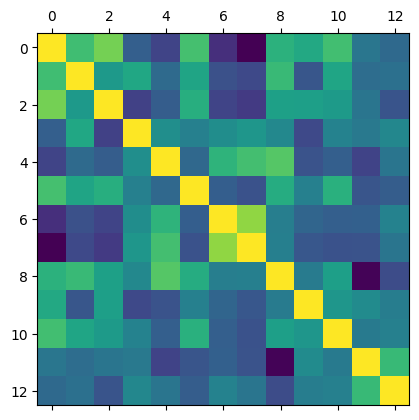

In [14]:
plt.matshow(wine_df.corr())
plt.show()

In [15]:
# g = sns.pairplot(wine_df, hue='quality', markers='+')
# plt.show()

### Insert Wine Dataframe into a new feature group
Let's write our historical wine feature values and labels to a feature group.


In [16]:
print(cols_idxs)
np.insert(cols_idxs, len(cols_idxs), 12)

[ 0  2  3  5  6  8 11]


array([ 0,  2,  3,  5,  6,  8, 11, 12], dtype=int64)

In [17]:
wine_df_reduced = wine_df_renamed.iloc[:,np.insert(cols_idxs, len(cols_idxs), 12)]

In [18]:
wine_df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type                 6497 non-null   float64
 1   volatile_acidity     6497 non-null   float64
 2   citric_acid          6497 non-null   float64
 3   chlorides            6497 non-null   float64
 4   free_sulfur_dioxide  6497 non-null   float64
 5   density              6497 non-null   float64
 6   alcohol              6497 non-null   float64
 7   quality              6497 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 406.2 KB


In [19]:
keys = features_df_new.columns
print(len(keys))
print(keys)

7
Index(['type', 'volatile_acidity', 'citric_acid', 'chlorides',
       'free_sulfur_dioxide', 'density', 'alcohol'],
      dtype='object')


In [20]:
wine_fg = fs.get_or_create_feature_group(
    name="wine",
    version=1,
    primary_key= keys, 
    description="Wine dataset with reduced features")
wine_fg.insert(wine_df_reduced)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/203927/fs/203846/fg/228728


Uploading Dataframe: 0.00% |          | Rows 0/6497 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: wine_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/203927/jobs/named/wine_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x2798d799a80>, None)